<a href="https://colab.research.google.com/github/pythonuzgit/elmurodov/blob/master/Sound%20classification/Sound_of_Notes_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Usual Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import sklearn

# Librosa (the mother of audio files)
import librosa
import librosa.display
import IPython.display as ipd
import warnings
warnings.filterwarnings('ignore')

In [ ]:
import os
general_path = '/content'
print(list(os.listdir(f'{general_path}/notes_v2/')))

['Silence', 'F', 'n_metadata.csv', 'B', 'E', 'C', 'A', 'Flage', 'Barrel', 'G', 'D', 'Slap', 'Slide', 'PoffHon']


Explore Audio Data

In [ ]:
# Importing 1 file
y, sr = librosa.load(f'{general_path}/notes_v2/A/A1.wav')

print('y:', y, '\n')
print('y shape:', np.shape(y), '\n')
print('Sample Rate (KHz):', sr, '\n')

# Verify length of the audio
print('Check Len of Audio:', 661794/22050)

y: [ 0.00050126  0.00072146  0.00066305 ... -0.0020508  -0.00225327
 -0.0027033 ] 

y shape: (34963,) 

Sample Rate (KHz): 22050 

Check Len of Audio: 30.013333333333332


In [ ]:
# Trim leading and trailing silence from an audio signal
audio_file, _ = librosa.effects.trim(y)

# the result is an numpy ndarray
print('Audio File:', audio_file, '\n')
print('Audio File shape:', np.shape(audio_file))


Audio File: [ 0.00050126  0.00072146  0.00066305 ... -0.0020508  -0.00225327
 -0.0027033 ] 

Audio File shape: (34963,)


2D Representation: Sound Waves

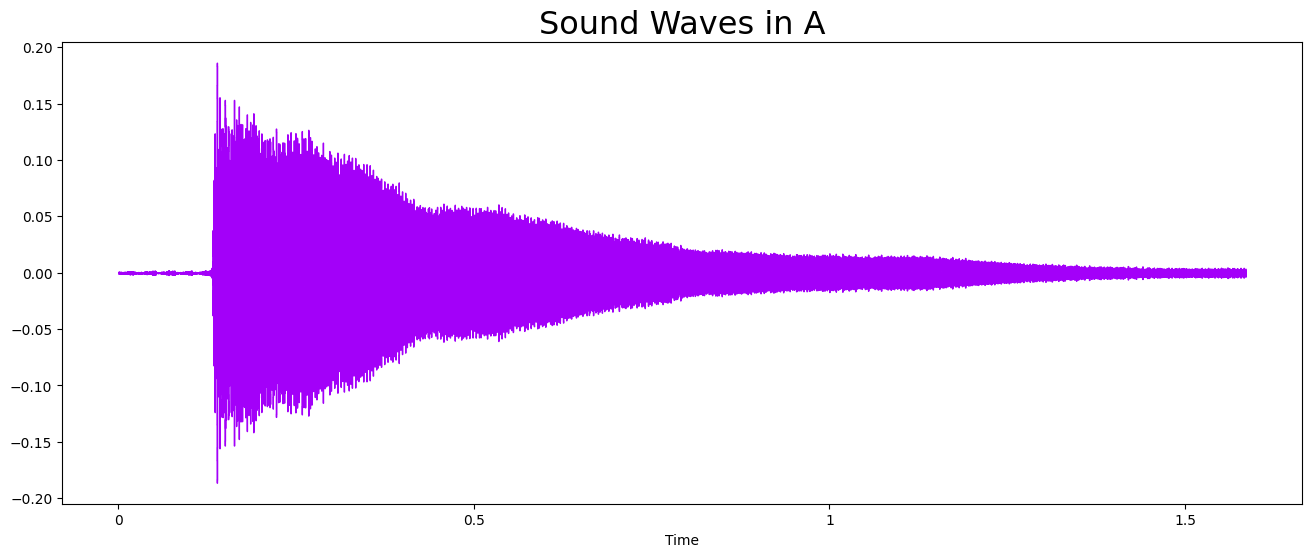

In [ ]:
plt.figure(figsize = (16, 6))
librosa.display.waveshow(y = audio_file, sr = sr, color = "#A300F9");
plt.title("Sound Waves in A", fontsize = 23);

Fourier Transform

In [ ]:
# Default FFT window size
n_fft = 2048 # FFT window size
hop_length = 512 # number audio of frames between STFT columns (looks like a good default)

# Short-time Fourier transform (STFT)
D = np.abs(librosa.stft(audio_file, n_fft = n_fft, hop_length = hop_length))

print('Shape of D object:', np.shape(D))

Shape of D object: (1025, 69)


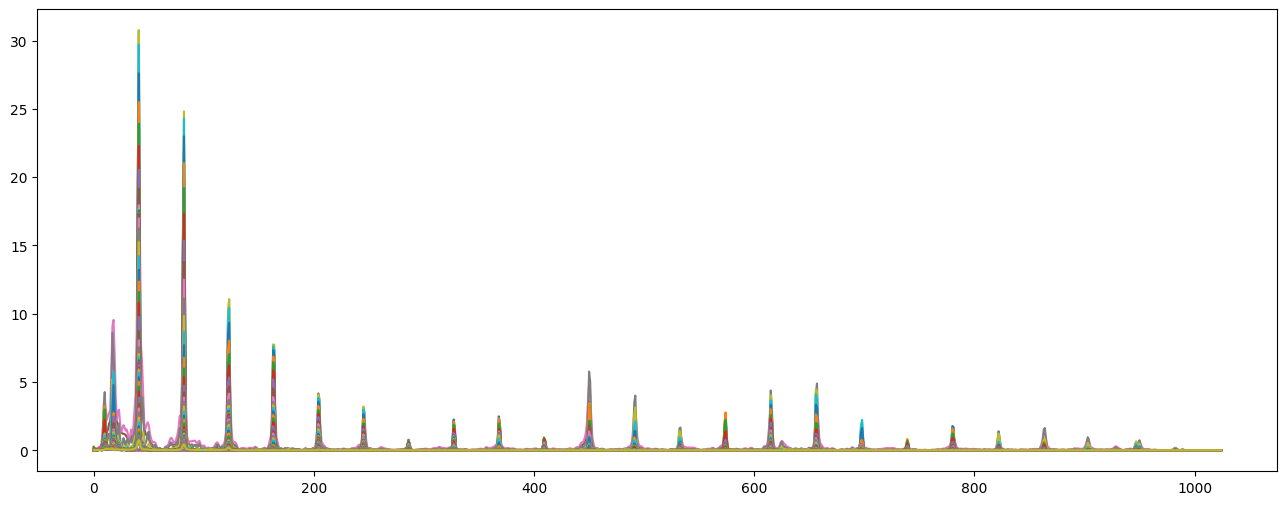

In [ ]:
plt.figure(figsize = (16, 6))
plt.plot(D);

The Spectrogram

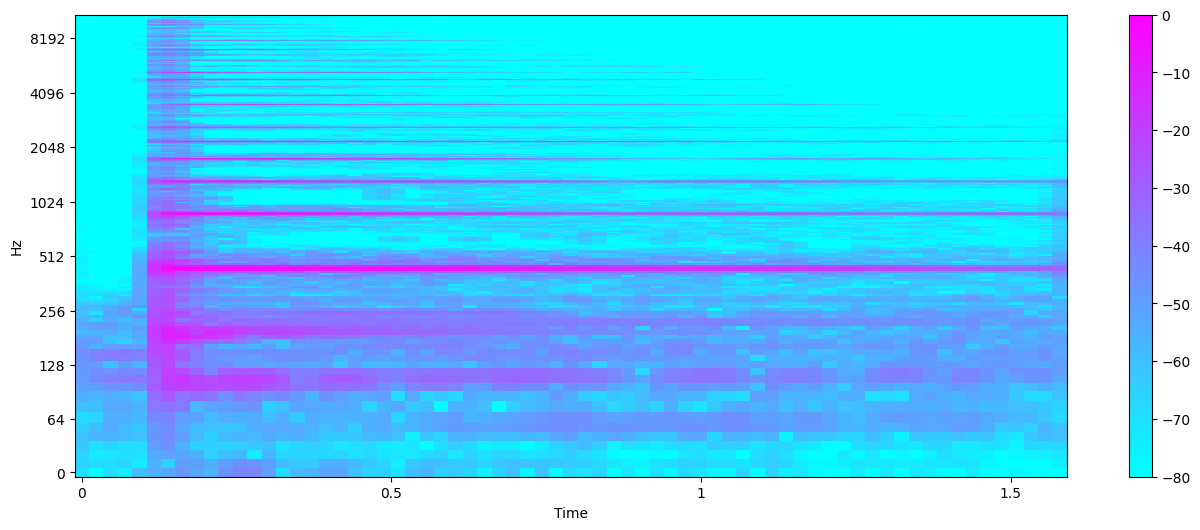

In [ ]:
# Convert an amplitude spectrogram to Decibels-scaled spectrogram.
DB = librosa.amplitude_to_db(D, ref = np.max)

# Creating the Spectogram
plt.figure(figsize = (16, 6))
librosa.display.specshow(DB, sr = sr, hop_length = hop_length, x_axis = 'time', y_axis = 'log',
                        cmap = 'cool')
plt.colorbar();

Mel Spectrogram

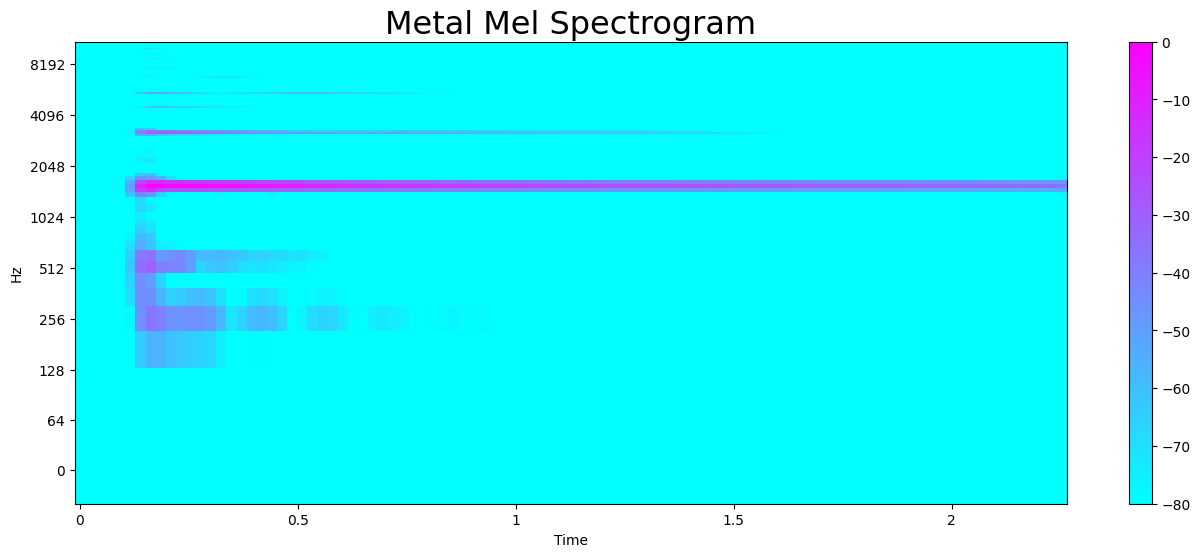

In [ ]:
y, sr = librosa.load(f'{general_path}/notes_v2/B/B1.wav')
y, _ = librosa.effects.trim(y)

S = librosa.feature.melspectrogram(y=y, sr=sr)
S_DB = librosa.amplitude_to_db(S, ref=np.max)
plt.figure(figsize = (16, 6))
librosa.display.specshow(S_DB, sr=sr, hop_length=hop_length, x_axis = 'time', y_axis = 'log',
                        cmap = 'cool');
plt.colorbar();
plt.title("Metal Mel Spectrogram", fontsize = 23);

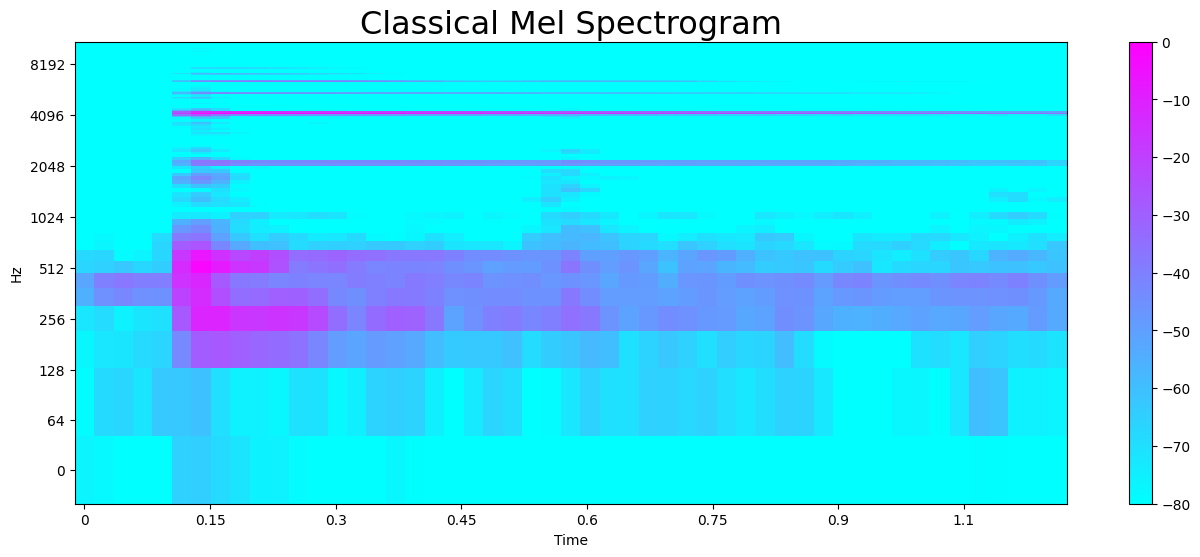

In [ ]:
y, sr = librosa.load(f'{general_path}/notes_v2/Flage/Flage1.wav')
y, _ = librosa.effects.trim(y)


S = librosa.feature.melspectrogram(y=y, sr=sr)
S_DB = librosa.amplitude_to_db(S, ref=np.max)
plt.figure(figsize = (16, 6))
librosa.display.specshow(S_DB, sr=sr, hop_length=hop_length, x_axis = 'time', y_axis = 'log',
                        cmap = 'cool');
plt.colorbar();
plt.title("Classical Mel Spectrogram", fontsize = 23);


Audio Features

In [ ]:
# Total zero_crossings in our 1 song
zero_crossings = librosa.zero_crossings(audio_file, pad=False)
print(sum(zero_crossings))

1795


Harmonics and Perceptrual

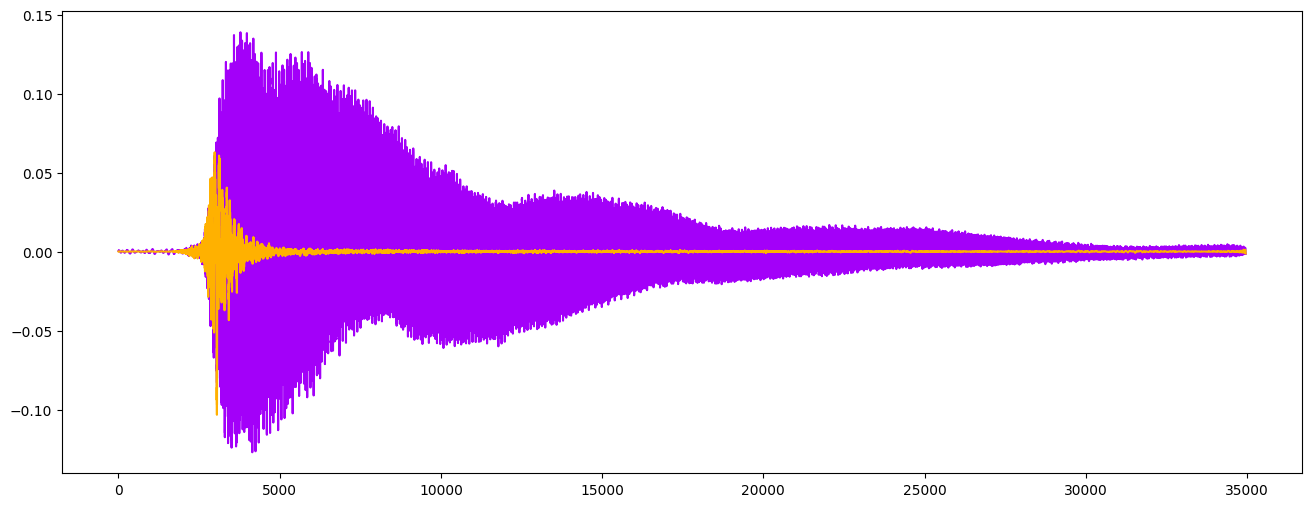

In [ ]:
y_harm, y_perc = librosa.effects.hpss(audio_file)

plt.figure(figsize = (16, 6))
plt.plot(y_harm, color = '#A300F9');
plt.plot(y_perc, color = '#FFB100');

Tempo BMP (beats per minute)

In [ ]:
tempo, _ = librosa.beat.beat_track(y=y, sr = sr)
tempo

135.99917763157896

Spectral Centroid

In [ ]:
# Calculate the Spectral Centroids
spectral_centroids = librosa.feature.spectral_centroid(y=audio_file, sr=sr)[0]

# Shape is a vector
print('Centroids:', spectral_centroids, '\n')
print('Shape of Spectral Centroids:', spectral_centroids.shape, '\n')

# Computing the time variable for visualization
frames = range(len(spectral_centroids))

# Converts frame counts to time (seconds)
t = librosa.frames_to_time(frames)

print('frames:', frames, '\n')
print('t:', t)

# Function that normalizes the Sound Data
def normalize(x, axis=0):
    return sklearn.preprocessing.minmax_scale(x, axis=axis)

Centroids: [1242.51834716 1154.97217     995.06759287  988.71406304 2038.16485569
 2553.91351595 2589.53580725 2618.0506663  2434.06920035 2346.25250848
 2289.30611923 2240.98216855 2121.14291902 1983.25551915 1899.12151771
 1854.65496424 1821.45778386 1710.82963219 1648.59027672 1624.1238299
 1598.54214751 1504.23184826 1452.72900477 1385.72606842 1335.35507962
 1247.19166234 1185.09424789 1146.99898672 1139.631593   1127.9395929
 1107.08116264 1079.24123917 1064.30631981 1060.31477246 1041.35254166
 1051.96388721 1056.3023186  1059.24215326 1056.89478953 1055.32636161
 1008.5905647   944.01834747  911.13664302  875.03087426  852.45225185
  845.96941329  850.81725799  844.41143585  811.30276452  831.44733463
  822.54608675  805.64193335  833.25999302  842.92254424  844.4079775
  850.57577663  849.75273514  840.0893817   833.77535348  892.60916069
  934.86917992  916.970034    936.2557019  1029.1066653  1033.04416439
 1004.49759387 1019.26278681 1064.53132676 1493.72080945] 

Shape of 

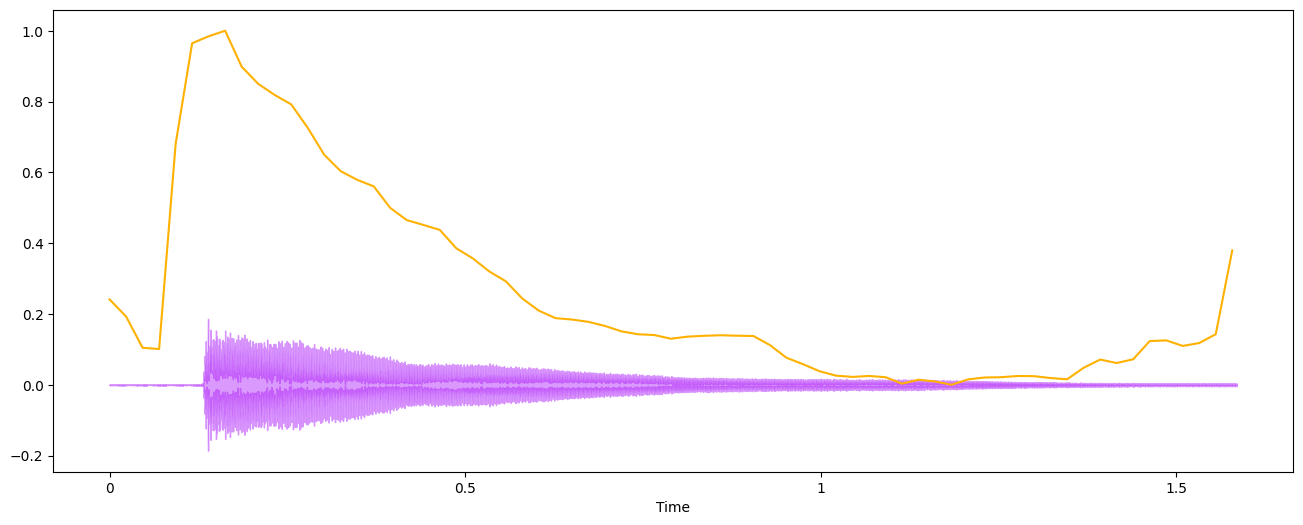

In [ ]:
#Plotting the Spectral Centroid along the waveform
plt.figure(figsize = (16, 6))
librosa.display.waveshow(y=audio_file, sr=sr, alpha=0.4, color = '#A300F9');
plt.plot(t, normalize(spectral_centroids), color='#FFB100');

Spectral Rolloff

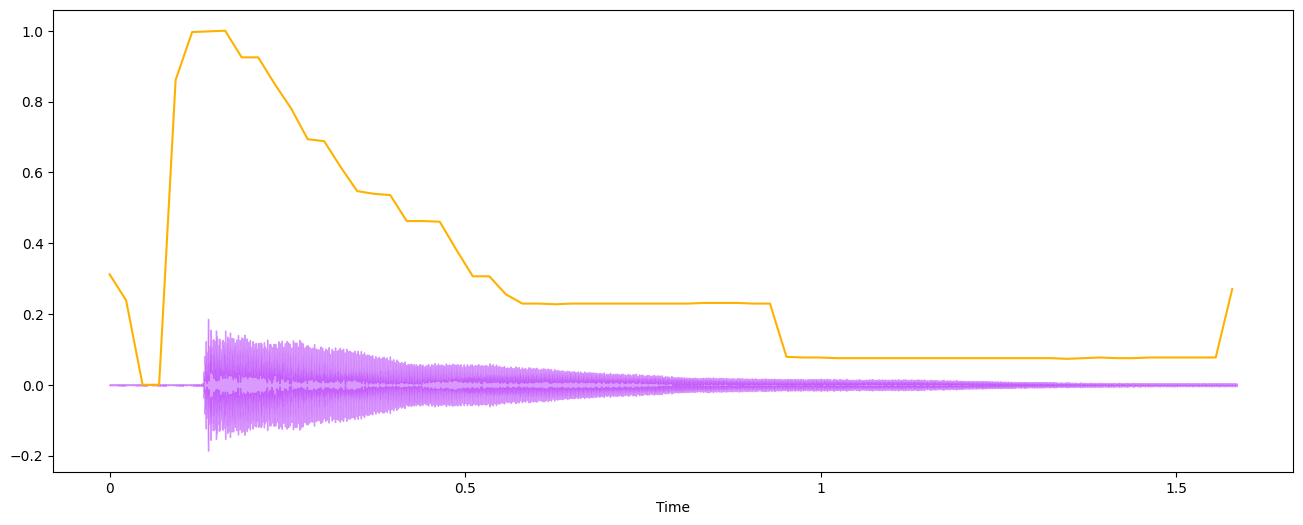

In [ ]:
# Spectral RollOff Vector
spectral_rolloff = librosa.feature.spectral_rolloff(y=audio_file, sr=sr)[0]

# The plot
plt.figure(figsize = (16, 6))
librosa.display.waveshow(audio_file, sr=sr, alpha=0.4, color = '#A300F9');
plt.plot(t, normalize(spectral_rolloff), color='#FFB100');

Mel-Frequency Cepstral Coefficients:

mfccs shape: (20, 69)


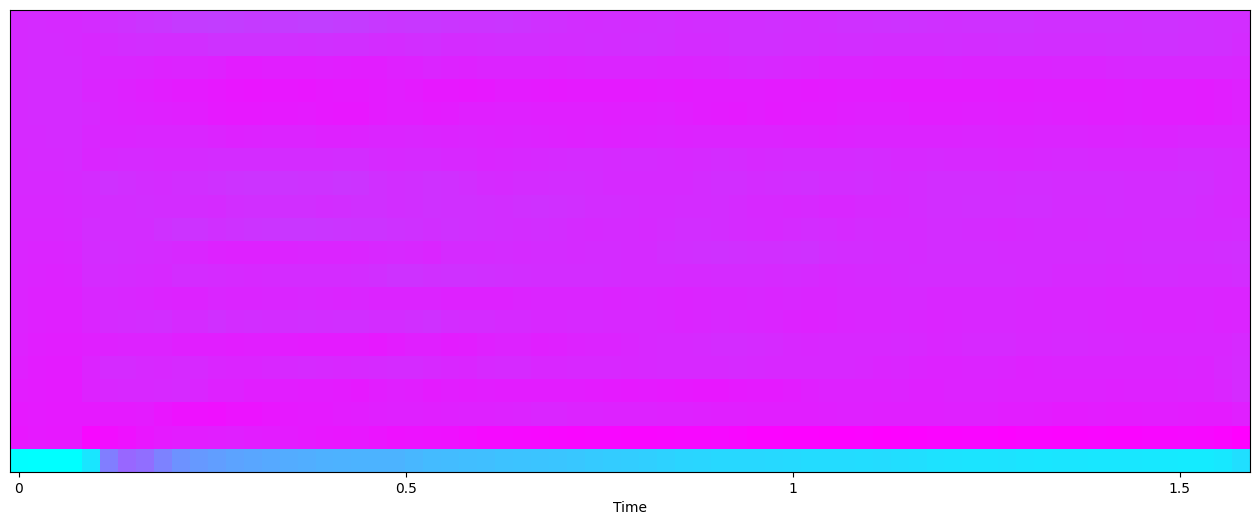

In [ ]:
mfccs = librosa.feature.mfcc(y=audio_file, sr=sr)
print('mfccs shape:', mfccs.shape)

#Displaying  the MFCCs:
plt.figure(figsize = (16, 6))
librosa.display.specshow(mfccs, sr=sr, x_axis='time', cmap = 'cool');

Data needs to be scaled:

Mean: 6.9106837e-10 

Var: 1.0


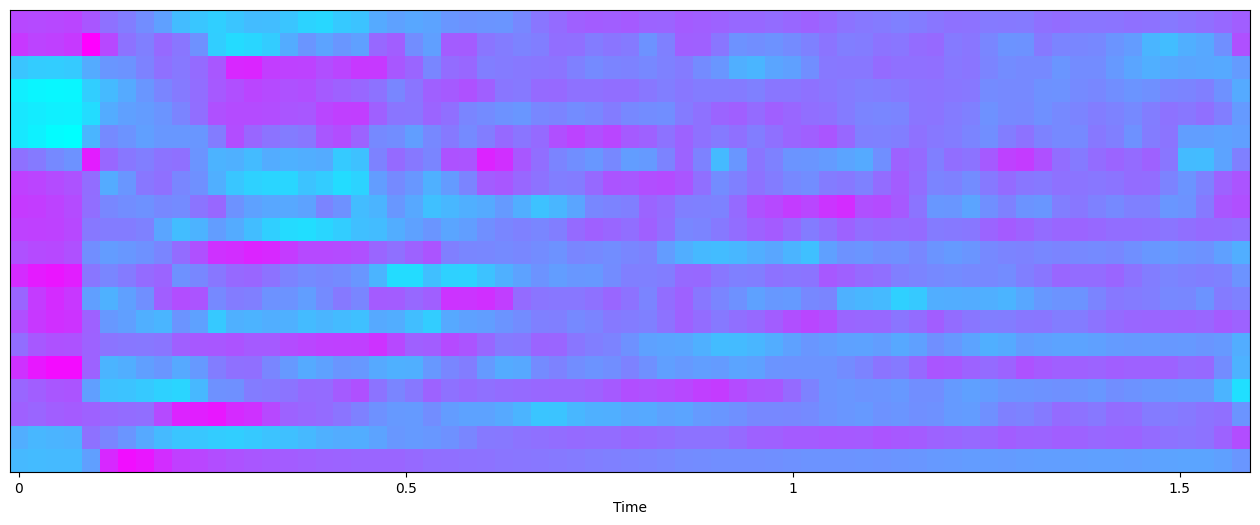

In [ ]:
# Perform Feature Scaling
mfccs = sklearn.preprocessing.scale(mfccs, axis=1)
print('Mean:', mfccs.mean(), '\n')
print('Var:', mfccs.var())

plt.figure(figsize = (16, 6))
librosa.display.specshow(mfccs, sr=sr, x_axis='time', cmap = 'cool');

Chroma Frequencies

Chromogram shape: (12, 7)


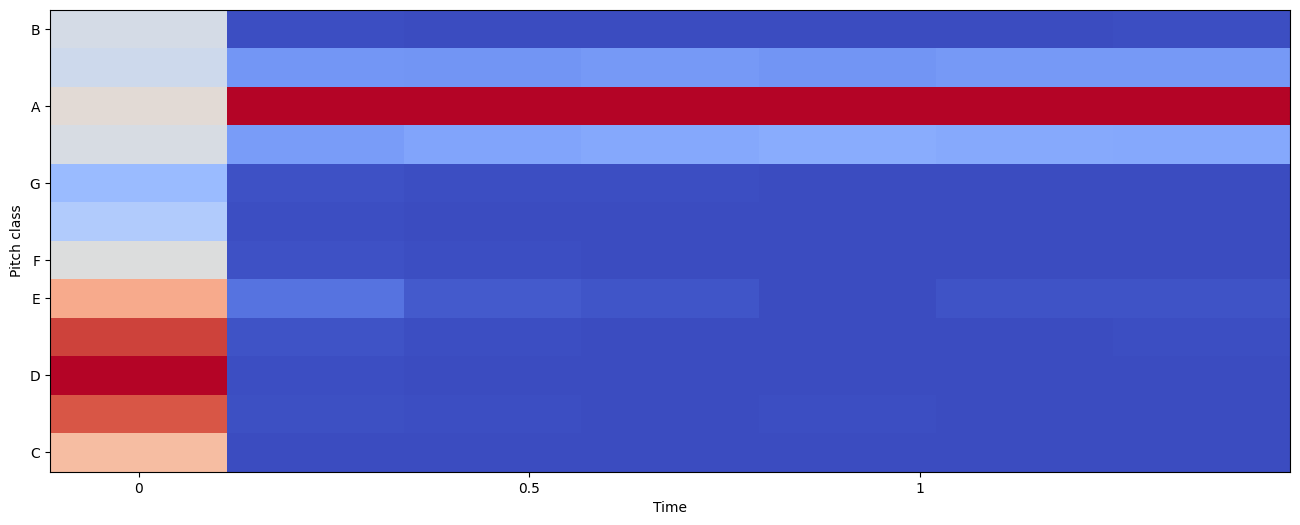

In [ ]:
# Increase or decrease hop_length to change how granular you want your data to be
hop_length = 5000

# Chromogram
chromagram = librosa.feature.chroma_stft(y=audio_file, sr=sr, hop_length=hop_length)
print('Chromogram shape:', chromagram.shape)

plt.figure(figsize=(16, 6))
librosa.display.specshow(chromagram, x_axis='time', y_axis='chroma', hop_length=hop_length, cmap='coolwarm');

EDA

In [ ]:
data = pd.read_csv(f'{general_path}/notes_v2/n_metadata.csv')
data.head()

,Sample,Class_ID,Class
0,./input/notes_v2/A/A1.wav,1,A
1,./input/notes_v2/A/A1.wav_000.wav,1,A
2,./input/notes_v2/A/A1.wav_010.wav,1,A
3,./input/notes_v2/A/A2.wav,1,A
4,./input/notes_v2/A/A2.wav_001.wav,1,A


Principal Component Analysis - to visualize possible groups of genres¶

In [ ]:
data = pd.read_csv(f'{general_path}/notes_v2/n_metadata.csv')
data.head()

,Sample,Class_ID,Class
0,./input/notes_v2/A/A1.wav,1,A
1,./input/notes_v2/A/A1.wav_000.wav,1,A
2,./input/notes_v2/A/A1.wav_010.wav,1,A
3,./input/notes_v2/A/A2.wav,1,A
4,./input/notes_v2/A/A2.wav_001.wav,1,A


In [ ]:
y = data['Class_ID'] # genre variable.
X = data.loc[:, data.columns != 'Class_ID']

In [ ]:
from sklearn import preprocessing

X = data[['Sample', 'Class']]
y = data['Class_ID'].astype(int)
#X = data.loc[:, data.columns != 'label']

#### NORMALIZE X ####
cols = X.columns
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
for column_name in X.columns:
  if X[column_name].dtype == object:

    X[column_name] = le.fit_transform(X[column_name])
  else:
    pass

#### PCA 2 COMPONENTS ####
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
principalComponents = pca.fit_transform(X)
principalDf = pd.DataFrame(data = principalComponents, columns = ['principal component 1', 'principal component 2'])

# concatenate with target label
finalDf = pd.concat([principalDf, y], axis = 1)

pca.explained_variance_ratio_

array([9.99980762e-01, 1.92384796e-05])

Text(0, 0.5, 'Principal Component 2')

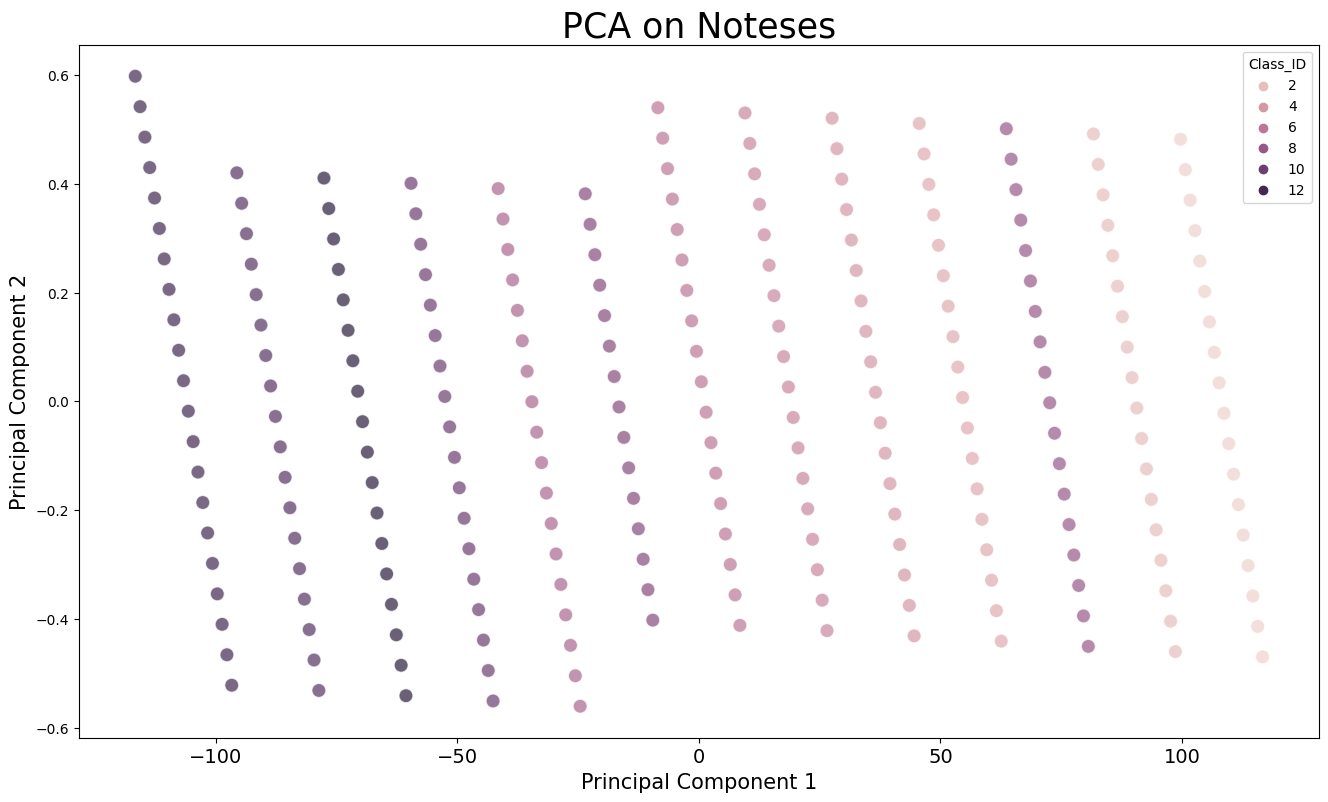

In [ ]:
plt.figure(figsize = (16, 9))
sns.scatterplot(x = "principal component 1", y = "principal component 2", data = finalDf,
                hue = "Class_ID", alpha = 0.7,
               s = 100);

plt.title('PCA on Noteses', fontsize = 25)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 10);
plt.xlabel("Principal Component 1", fontsize = 15)
plt.ylabel("Principal Component 2", fontsize = 15)
#plt.savefig("PCA Scattert.jpg")

Machine Learning Classification

Libraries

In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import SGDClassifier, LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier, XGBRFClassifier
from xgboost import plot_tree, plot_importance

from sklearn.metrics import confusion_matrix, accuracy_score, roc_auc_score, roc_curve
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE

Reading in the Data

In [ ]:
data = pd.read_csv(f'{general_path}/notes_v2/n_metadata.csv')
data.head()

,Sample,Class_ID,Class
0,./input/notes_v2/A/A1.wav,1,A
1,./input/notes_v2/A/A1.wav_000.wav,1,A
2,./input/notes_v2/A/A1.wav_010.wav,1,A
3,./input/notes_v2/A/A2.wav,1,A
4,./input/notes_v2/A/A2.wav_001.wav,1,A


Features and Target variable

In [ ]:
y = data['Class_ID']
X = data.loc[:, data.columns != 'Class_ID']

normalizes the data

In [ ]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
for column_name in X.columns:
  if X[column_name].dtype == object:

    X[column_name] = le.fit_transform(X[column_name])
  else:
    pass

Splitting the data into training and testing

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
#Train, test split
print ('Train set:', X_train.shape,  y_train.shape)     #Check the size after split
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (163, 2) (163,)
Test set: (71, 2) (71,)


Creating a Predefined function to assess the accuracy of a model¶


In [ ]:
def model_assess(model, title = "Default"):
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    #print(confusion_matrix(y_test, preds))
    print('Accuracy', title, ':', round(accuracy_score(y_test, preds), 5), '\n')

Trying 8 different models to assess their performance

In [ ]:
# Naive Bayes
nb = GaussianNB()
model_assess(nb, "Naive Bayes")

# Stochastic Gradient Descent
sgd = SGDClassifier(max_iter=5000, random_state=0)
model_assess(sgd, "Stochastic Gradient Descent")

# KNN
knn = KNeighborsClassifier(n_neighbors=19)
model_assess(knn, "KNN")

# Decission trees
tree = DecisionTreeClassifier()
model_assess(tree, "Decission trees")

# Random Forest
rforest = RandomForestClassifier(n_estimators=1000, max_depth=10, random_state=0)
model_assess(rforest, "Random Forest")

# Support Vector Machine
svm = SVC(decision_function_shape="ovo")
model_assess(svm, "Support Vector Machine")

# Logistic Regression
lg = LogisticRegression(random_state=0, solver='lbfgs', multi_class='multinomial')
model_assess(lg, "Logistic Regression")


# Neural Nets
nn = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(5000, 10), random_state=1)
model_assess(nn, "Neural Nets")


Accuracy Naive Bayes : 1.0 

Accuracy Stochastic Gradient Descent : 0.09859 

Accuracy KNN : 0.84507 

Accuracy Decission trees : 0.95775 

Accuracy Random Forest : 1.0 

Accuracy Support Vector Machine : 0.46479 

Accuracy Logistic Regression : 0.60563 

Accuracy Neural Nets : 0.25352 



Confusion Matrix

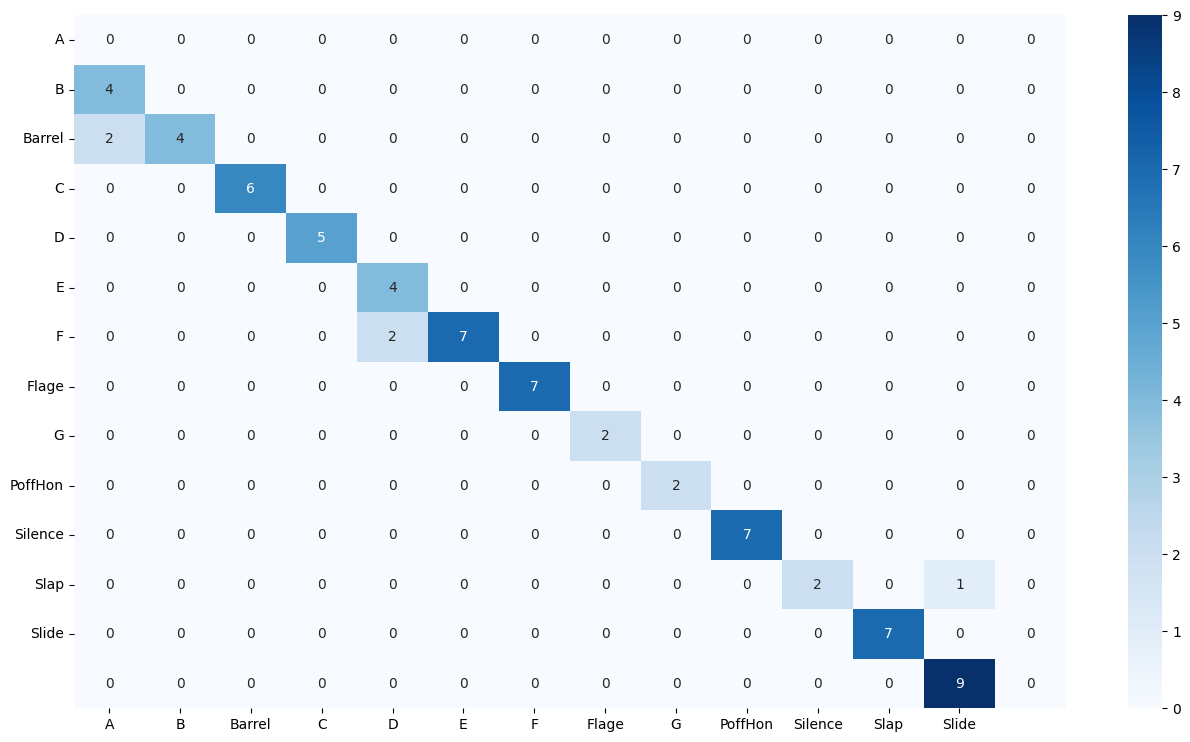

In [ ]:
confusion_matr = confusion_matrix(y_test, preds) #normalize = 'true'
plt.figure(figsize = (16, 9))
sns.heatmap(confusion_matr, cmap="Blues", annot=True,
            xticklabels = ["A", "B", "Barrel", "C", "D", "E", "F", "Flage", "G", "PoffHon",
                           "Silence", "Slap", "Slide"],
           yticklabels=["A", "B", "Barrel", "C", "D", "E", "F", "Flage", "G", "PoffHon",
                        "Silence", "Slap", "Slide"]);
plt.savefig("conf matrix")